# **DATA PREPROCESSING**

**Setting Up Google Colab:**

Google Colab is an online environment similar to Jupiter notebook where you can train deep learning models on GPU. The free plan of Google Colab allows you to train the deep learning model for up to 12 hrs before the runtime disconnects. By visiting the runtime section change run type to GPU.

**Downloading, Uploading and Mounting Google Drive:**

I have downloaded and extracted waste_dataset folder and uploaded to Google drive in the 'MyDrive/waste_dataset/' path, I will mount drive using the below code. (It will ask you to enter the authorization code that you can by clicking the link that will appear below).

As for the data availability, we have trained a model to identify the organic and recyclable waste categories. This is a sample model used at the segregation level and a dataset containing non - recyclable waste is needed to develop the actual model.
Raw Dataset Link: https://drive.google.com/drive/folders/1QnlL8wPvbXLLftWLUpWjkUZTtVNHhNqZ?usp=sharing
Train, test, validation split: https://drive.google.com/drive/folders/15WpkV2UAfwXKoIlpNtfrOdcjLW9PHrXr?usp=sharing


In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
!ls

drive  sample_data


**LIBRARIES**

In [ ]:
from PIL import Image
import numpy as np
from numpy import random


import os
import pathlib
import random

**DIRECTORIES**

In [ ]:
# directory of dataset
dir_original = "/content/drive/MyDrive/waste_dataset"


# name of new dataset  where the train, val and test datasets will be created
dir_processed = "/content/drive/MyDrive/augmented_waste_dataset_splited"



In [ ]:
!pwd

/content


In [ ]:
# directory of dataset
!ls '/content/drive/MyDrive/waste_dataset'

organic  recyclable


**PARAMETERS**

In [ ]:
# size of new images
size = 225, 264

**EXTRACTION OF DATASET INFORMATION**

In [ ]:
data_dir = pathlib.Path(dir_original)
print (data_dir)

/content/drive/MyDrive/waste_dataset


In [ ]:
set_samples = ['train', 'validation', 'test']
print("set_samples: ", set_samples, "\n")

set_samples:  ['train', 'validation', 'test'] 



In [ ]:
CLASS_NAMES = np.array([item.name for item in sorted(data_dir.glob('*'))])												
print("class: ", CLASS_NAMES, "\n")

class:  ['.DS_Store' 'organic' 'recyclable'] 



In [ ]:
os.listdir(dir_original)

['.DS_Store', 'recyclable', 'organic']

In [ ]:
import glob, os
# getting the number of organic images
org_filelist = glob.glob(dir_original+'/organic/*.jpg')
# getting the number of recyclable images
inorg_filelist = glob.glob(dir_original+'/recyclable/*.jpg')
print(len(org_filelist), len(inorg_filelist))
# creating numpy aray with len of organic and recyclable
N_IMAGES = np.array([len(org_filelist), len(inorg_filelist)])
print('Total:', N_IMAGES)

13913 10945
Total: [13913 10945]


In [ ]:
data_dir = pathlib.Path(dir_original)

set_samples = ['train', 'validation', 'test']
print("set_samples: ", set_samples, "\n")

CLASS_NAMES = np.array(['organic', 'recyclable'])
print("class: ", CLASS_NAMES, "\n")

# Specifying the daatset ratios for the test, val and test datsets
N_samples = np.array([(int(np.around(n*60/100)), int(np.around(n*15/100)), int(np.around(n*25/100))) for n in N_IMAGES])	# number of images for set (train,validation,test)
print("split of dataset: \n ", N_samples, "\n")



set_samples:  ['train', 'validation', 'test'] 

class:  ['organic' 'recyclable'] 

split of dataset: 
  [[8348 2087 3478]
 [6567 1642 2736]] 



In [ ]:
dir_processed

'/content/drive/MyDrive/augmented_waste_dataset_splited'

**PRE-PROCESSING DATASET**

In [ ]:
# create the dataset folder	where train,val and test will be saved		
if not os.path.exists(dir_processed):
  os.makedirs(dir_processed)

In [ ]:
# Create the new dataset
# Split Dataset	(also resize and rotate)
for set_tag in set_samples:
  if not os.path.exists(dir_processed + '/' + set_tag):
    os.makedirs(dir_processed + '/' + set_tag)
  for class_name in CLASS_NAMES:
    if not os.path.exists(dir_processed + '/' + set_tag + '/' + class_name):
      os.makedirs(dir_processed + '/' + set_tag + '/' + class_name)


# SPLIT DATASET (and resize)
print("Split dataset.....")

i=0
j=0
k=0
for class_name in CLASS_NAMES:												
	
    print("class name: ", class_name)

    contatore_samples = 0
    k=0

    array = sorted(os.listdir(dir_original + '/' + class_name))
    #random.shuffle(array)

    for image_name in array:	                                       
	
        print("image: ", i)
        i=i+1

        if contatore_samples==N_samples[j][k]:									
            k+=1
            contatore_samples=0


        img=Image.open(dir_original +'/'+class_name+'/'+image_name)
        l,_ = img.size
        l=int(l)
        
        
        if l==225 or l==264:
        
            transposed = img.transpose(Image.ROTATE_90)
            transposed.thumbnail(size)
            transposed.save(dir_processed+'/'+set_samples[k]+'/'+class_name+'/'+image_name)
        
        else:
        
            img.thumbnail(size)
            img.save(dir_processed+'/'+set_samples[k]+'/'+class_name+'/'+image_name)

        contatore_samples+=1	

    j+=1




Streaming output truncated to the last 5000 lines.
image:  19858
image:  19859
image:  19860
image:  19861
image:  19862
image:  19863
image:  19864
image:  19865
image:  19866
image:  19867
image:  19868
image:  19869
image:  19870
image:  19871
image:  19872
image:  19873
image:  19874
image:  19875
image:  19876
image:  19877
image:  19878
image:  19879
image:  19880
image:  19881
image:  19882
image:  19883
image:  19884
image:  19885
image:  19886
image:  19887
image:  19888
image:  19889
image:  19890
image:  19891
image:  19892
image:  19893
image:  19894
image:  19895
image:  19896
image:  19897
image:  19898
image:  19899
image:  19900
image:  19901
image:  19902
image:  19903
image:  19904
image:  19905
image:  19906
image:  19907
image:  19908
image:  19909
image:  19910
image:  19911
image:  19912
image:  19913
image:  19914
image:  19915
image:  19916
image:  19917
image:  19918
image:  19919
image:  19920
image:  19921
image:  19922
image:  19923
image:  19924
image:  199

# **MODEL FOR WASTE DATASET**




**LIBRARY**

In [ ]:
import tensorflow as tf
 
from tensorflow import keras
 
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
 
from tensorflow.keras.preprocessing import image_dataset_from_directory
 
import numpy as np
import matplotlib.pyplot as plt
import os
import time

**DIRECTORY**

In [ ]:
# Directory for the dataset
 
PATH_DATASET = '/content/drive/MyDrive/augmented_waste_dataset_splited'
 
train_data_dir = os.path.join(PATH_DATASET, 'train')
validation_data_dir = os.path.join(PATH_DATASET, 'validation')
test_data_dir = os.path.join(PATH_DATASET, 'test')
 
 
 
# Names of files to be created
 
PATH_MODELS = '/content/drive/MyDrive/Colab Notebooks/MDPI_Paper_10'
 
name_model_small = os.path.join(PATH_MODELS, 'model_small,h5')

In [ ]:
# Names of files to be created #test & temp
 
PATH_MODELS = '/content/drive/MyDrive/Colab Notebooks/MDPI_Paper_10'
 
name_model_small = os.path.join(PATH_MODELS, 'model_small,h5')

**PARAMETERS**

In [ ]:
batch_size = 32
 
nb_train_samples = 207522           # no of training samples
nb_validation_samples = 51880       # no of validation samples
nb_test_samples = 86468             # no of testing samples
 
n_class = 2
 
epochs = 10

# **MODEL (SMALL)**

In [ ]:
# image size (Model Small) # temp& test
img_width, img_height = 80, 45

Found 14915 files belonging to 2 classes.
Found 3729 files belonging to 2 classes.
Found 6214 files belonging to 2 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 80, 45, 32)        896       
                                                                 
 activation (Activation)     (None, 80, 45, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 40, 22, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 40, 22, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 40, 22, 32)        0         
                                                                

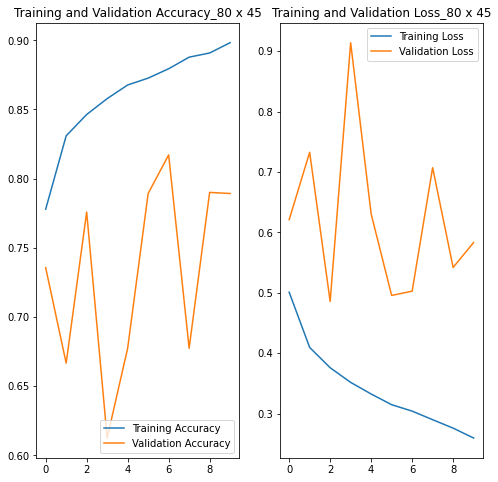

195/195 [==============================] - 583s 3s/step - loss: 0.5130 - accuracy: 0.8064
size of images:  80 45
test_result:  [0.5129902362823486, 0.8064048886299133]
Time taken for development model small 3132.1432394981384 sec



In [ ]:
start = time.time()
 
# image size (Model Small)
img_width, img_height = 80, 45
 
# input shape
if keras.backend.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)
 
 
 
# ***********************************************************************
# ************        DATASET       *************************************
# ***********************************************************************
 
train_dataset = image_dataset_from_directory(train_data_dir,
                                             shuffle=True,
                                             batch_size=batch_size,
                                             image_size=(img_width, img_height),
                                             label_mode='categorical')
 
 
validation_dataset = image_dataset_from_directory(validation_data_dir,
                                                  shuffle=True,
                                                  batch_size=batch_size,
                                                  image_size=(img_width, img_height),
                                                  label_mode='categorical')
 
 
test_dataset = image_dataset_from_directory(test_data_dir,
                                            shuffle=True,
                                            batch_size=batch_size,
                                            image_size=(img_width, img_height),
                                            label_mode='categorical')
 
 
# preprocessing: input scaling (./255)
train_dataset = train_dataset.map(lambda images, labels: (images/255, labels))
validation_dataset = validation_dataset.map(lambda images, labels: (images/255, labels))
test_dataset = test_dataset.map(lambda images, labels: (images/255, labels))


# ***********************************************************************
# **************        MODEL       *************************************
# ***********************************************************************
 
model_small = Sequential()
model_small.add(Conv2D(32, (3, 3), padding='same', input_shape=input_shape))
model_small.add(Activation('relu'))
model_small.add(MaxPooling2D(pool_size=(2, 2)))
 
model_small.add(Conv2D(32, (3, 3), padding='same'))
model_small.add(Activation('relu'))
model_small.add(MaxPooling2D(pool_size=(2, 2)))
 
model_small.add(Conv2D(64, (3, 3), padding='same'))
model_small.add(Activation('relu'))
model_small.add(MaxPooling2D(pool_size=(2, 2)))
 
model_small.add(Conv2D(64, (3, 3), padding='same'))
model_small.add(Activation('relu'))
model_small.add(MaxPooling2D(pool_size=(2, 2)))
 
model_small.add(Conv2D(32, (3, 3), padding='same'))
model_small.add(Activation('relu'))
model_small.add(MaxPooling2D(pool_size=(2, 2)))
 
model_small.add(Flatten())
model_small.add(Dense(64))
model_small.add(Activation('relu'))
model_small.add(Dropout(0.5))
model_small.add(Dense(2))           #because we have 2 class
model_small.add(Activation('softmax'))
 
model_small.summary()
 
 
# ***********************************************************************
# *******************        COMPILATION       **************************
# ***********************************************************************
 
 
model_small.compile(loss='categorical_crossentropy',
            optimizer=keras.optimizers.Adadelta(learning_rate=1, name='Adadelta'),
            metrics=['accuracy'])
 
 
 
# ***********************************************************************
# *******************        TRAINING       *****************************
# ***********************************************************************
 
 
with tf.device('/device:GPU:0'):
 
  history = model_small.fit(
    train_dataset,
    epochs=epochs,
    validation_data=validation_dataset)
 
 
 
# ***********************************************************************
# *****************        SAVE MODEL        ****************************
# ***********************************************************************
 
 
model_small.save(name_model_small)
 
 
 
# ***********************************************************************
# ********************        PLOT RESULTS        ***********************
# ***********************************************************************
 
 
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
 
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs_range = range(epochs)
 
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy_'+str(img_width)+' x '+str(img_height))
 
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss_'+str(img_width)+' x '+str(img_height))
plt.show()
 
 
 
# ***********************************************************************
# ***********************        TEST        ****************************
# ***********************************************************************
 
with tf.device('/device:GPU:0'):
 
  test_result = model_small.evaluate(test_dataset)
 
  
print("size of images: ", img_width,img_height)
print("test_result: ", test_result)
 
 
print ('Time taken for development model small {} sec\n'.format(time.time() - start))

In [ ]:
#class_names ,class_names_val, class_names_test

In [ ]:
from tensorflow import keras

In [ ]:
model = keras.models.load_model(name_model_small)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 80, 45, 32)        896       
                                                                 
 activation (Activation)     (None, 80, 45, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 40, 22, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 40, 22, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 40, 22, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 20, 11, 32)       0         
 2D)                                                    

In [ ]:
class_names = ['organic', 'recyclable']

In [ ]:
# get class for a single image
img_path = "/content/drive/MyDrive/augmented_waste_dataset_splited/test/recyclable"

In [ ]:
!ls "/content/drive/MyDrive/augmented_waste_dataset_splited/test/recyclable" -U | head -4

recyclable_010154_photo.jpg
recyclable_010155_photo.jpg
recyclable_010157_photo.jpg
recyclable_010156_photo.jpg


In [ ]:
img_name= 'recyclable_010102_photo.jpg'

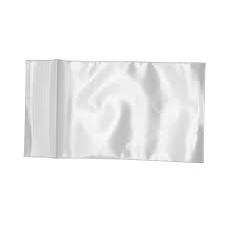

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
image = cv2.imread(img_path+'/'+img_name)
cv2_imshow(image)
print('\n')

In [ ]:
img = tf.keras.utils.load_img(img_path+'/'+img_name, target_size=(img_width, img_height)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

predictions = model.predict(img_array)
print("This image most likely belongs to '{}' class".format(class_names[int(np.argmax(predictions[0]))]))

1/1 [==============================] - 0s 152ms/step
This image most likely belongs to 'recyclable' class
